In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Data/mymoviedb.csv",engine='python',on_bad_lines='skip')

In [3]:
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


Change object in original values

In [4]:

df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

In [5]:
df['Vote_Count']=df['Vote_Count'].fillna(0).astype(int)

In [6]:
df['Vote_Average']=pd.to_numeric(df['Vote_Average'],errors='coerce')

In [7]:
df['Vote_Average']=df['Vote_Average'].fillna(0).astype(float)

In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'],errors='coerce')
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date']=df['Release_Date'].fillna(0).astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9837 non-null   int64  
 5   Vote_Average       9837 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 691.8+ KB


In [10]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9837.000000,9827.000000,9837.000000,9837.000000
mean,2004.164176,40.320570,1391.386093,6.432266
std,65.829992,108.874308,2610.258502,1.149494
min,0.000000,7.100000,0.000000,0.000000
25%,2000.000000,16.127500,146.000000,5.900000
50%,2011.000000,21.191000,443.000000,6.500000
75%,2017.000000,35.174500,1375.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


Drop and fill null values in dataset

In [11]:
df=df.dropna(subset=['Release_Date'])

In [12]:
df['Popularity']=df['Popularity'].fillna(df['Popularity'].mean())

In [13]:
df=df.dropna(subset=['Original_Language'])

In [14]:
df=df.dropna(subset=['Genre'])

In [15]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
cols=['Overview','Original_Language','Poster_Url']

In [18]:
df.drop(cols, axis=1, inplace=True)

In [19]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categories Vote Average Column

In [20]:
def categories_col(df,col,labels):

  edges=[df[col].describe()['min'],
         df[col].describe()['25%'],
         df[col].describe()['50%'],
         df[col].describe()['75%'],
         df[col].describe()['max']]
  df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
  return df

In [21]:
labels=['Not Popular','Below Average','Average','Popular']
categories_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below Average', 'Average', 'Not Popular', NaN]
Categories (4, object): ['Not Popular' < 'Below Average' < 'Average' < 'Popular']

In [22]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [23]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not Popular,2467
Popular,2450
Average,2411
Below Average,2398


In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [26]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [28]:
df['Genre']=df['Genre'].astype('category')

In [31]:
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [32]:
df.nunique()

,0
Release_Date,100
Title,9414
Popularity,8087
Vote_Count,3265
Vote_Average,4
Genre,19


In [33]:
sns.set_style('whitegrid')

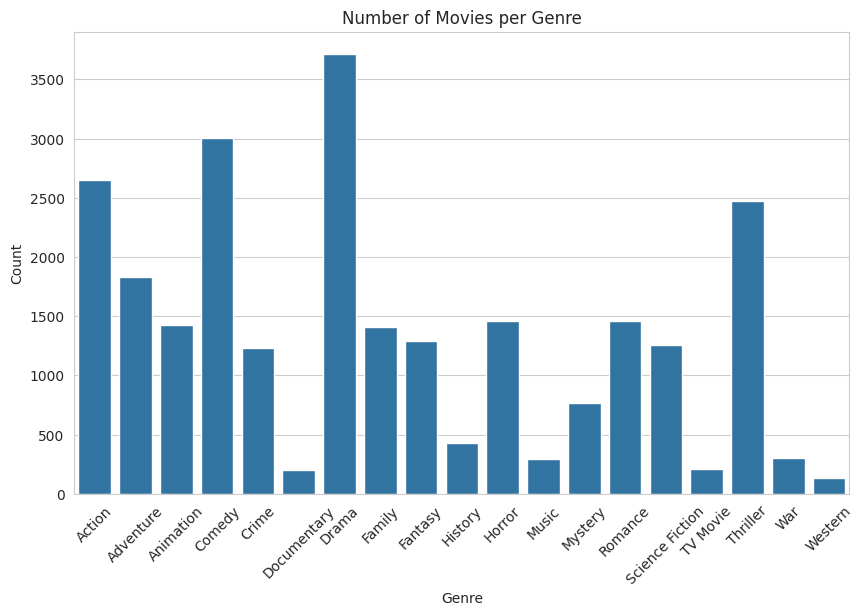

In [34]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Genre', y='Count', data=genre_counts)

plt.xticks(rotation=45)
plt.title('Number of Movies per Genre')
plt.show()
